## Creating graphs for the assessment

This notebook outputs the graphs required for the report, using the dataset with 20 iterations per condition.

In [1]:
# load libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [24]:
# load results

# path
path_results = os.path.join('models', 'outputs', 'enhanced_iterations')

# Sugarscape 2
s2_df = pd.read_csv(
    os.path.join(path_results, 'Sugarscape 2 Constant Growback_edit metab_vision_pop-table.csv'),
    skiprows = 6
)

# Sugarscape 3
s3_df = pd.read_csv(
    os.path.join(path_results, 'Sugarscape 3 Wealth Distribution_edit metab-vision-pop-table.csv'),
    skiprows = 6
)


In [25]:
# insert column with model name
s2_df.insert(0, 'model', 'Sugarscape 2')
s3_df.insert(0, 'model', 'Sugarscape 3')

# combine dataframes
combined_df = pd.concat([s2_df, s3_df])

In [29]:
combined_df.head(2)

,model,[run number],initial-population,max-metabolism,max-vision,[step],count turtles,survival-rate,last-death,gini-index,mean [vision] of turtles,mean [metabolism] of turtles
0,Sugarscape 2,1,100,2,2,125,73,0.730,23.0,0.252937,1.547945,1.479452
1,Sugarscape 2,2,200,2,2,126,163,0.815,24.0,0.300663,1.509202,1.404908


In [84]:
agg_df = combined_df.groupby(['model', 'initial-population', 'max-metabolism', 'max-vision']).agg(
    {
        'count turtles': ['mean', 'std'],
        'survival-rate': ['mean', 'std'],
        'gini-index': ['mean', 'std']
    }
).reset_index()

agg_df.columns = agg_df.columns.map('_'.join)

agg_df = agg_df.rename(
    columns = {
        'model_': 'Model',
        'initial-population_': 'Initial Population',
        'max-metabolism_': 'Max. Metabolism',
        'max-vision_': 'Max. Vision'
    }
)

### Comparison between 2 models

In this section, I created the images for comparing 2 models.

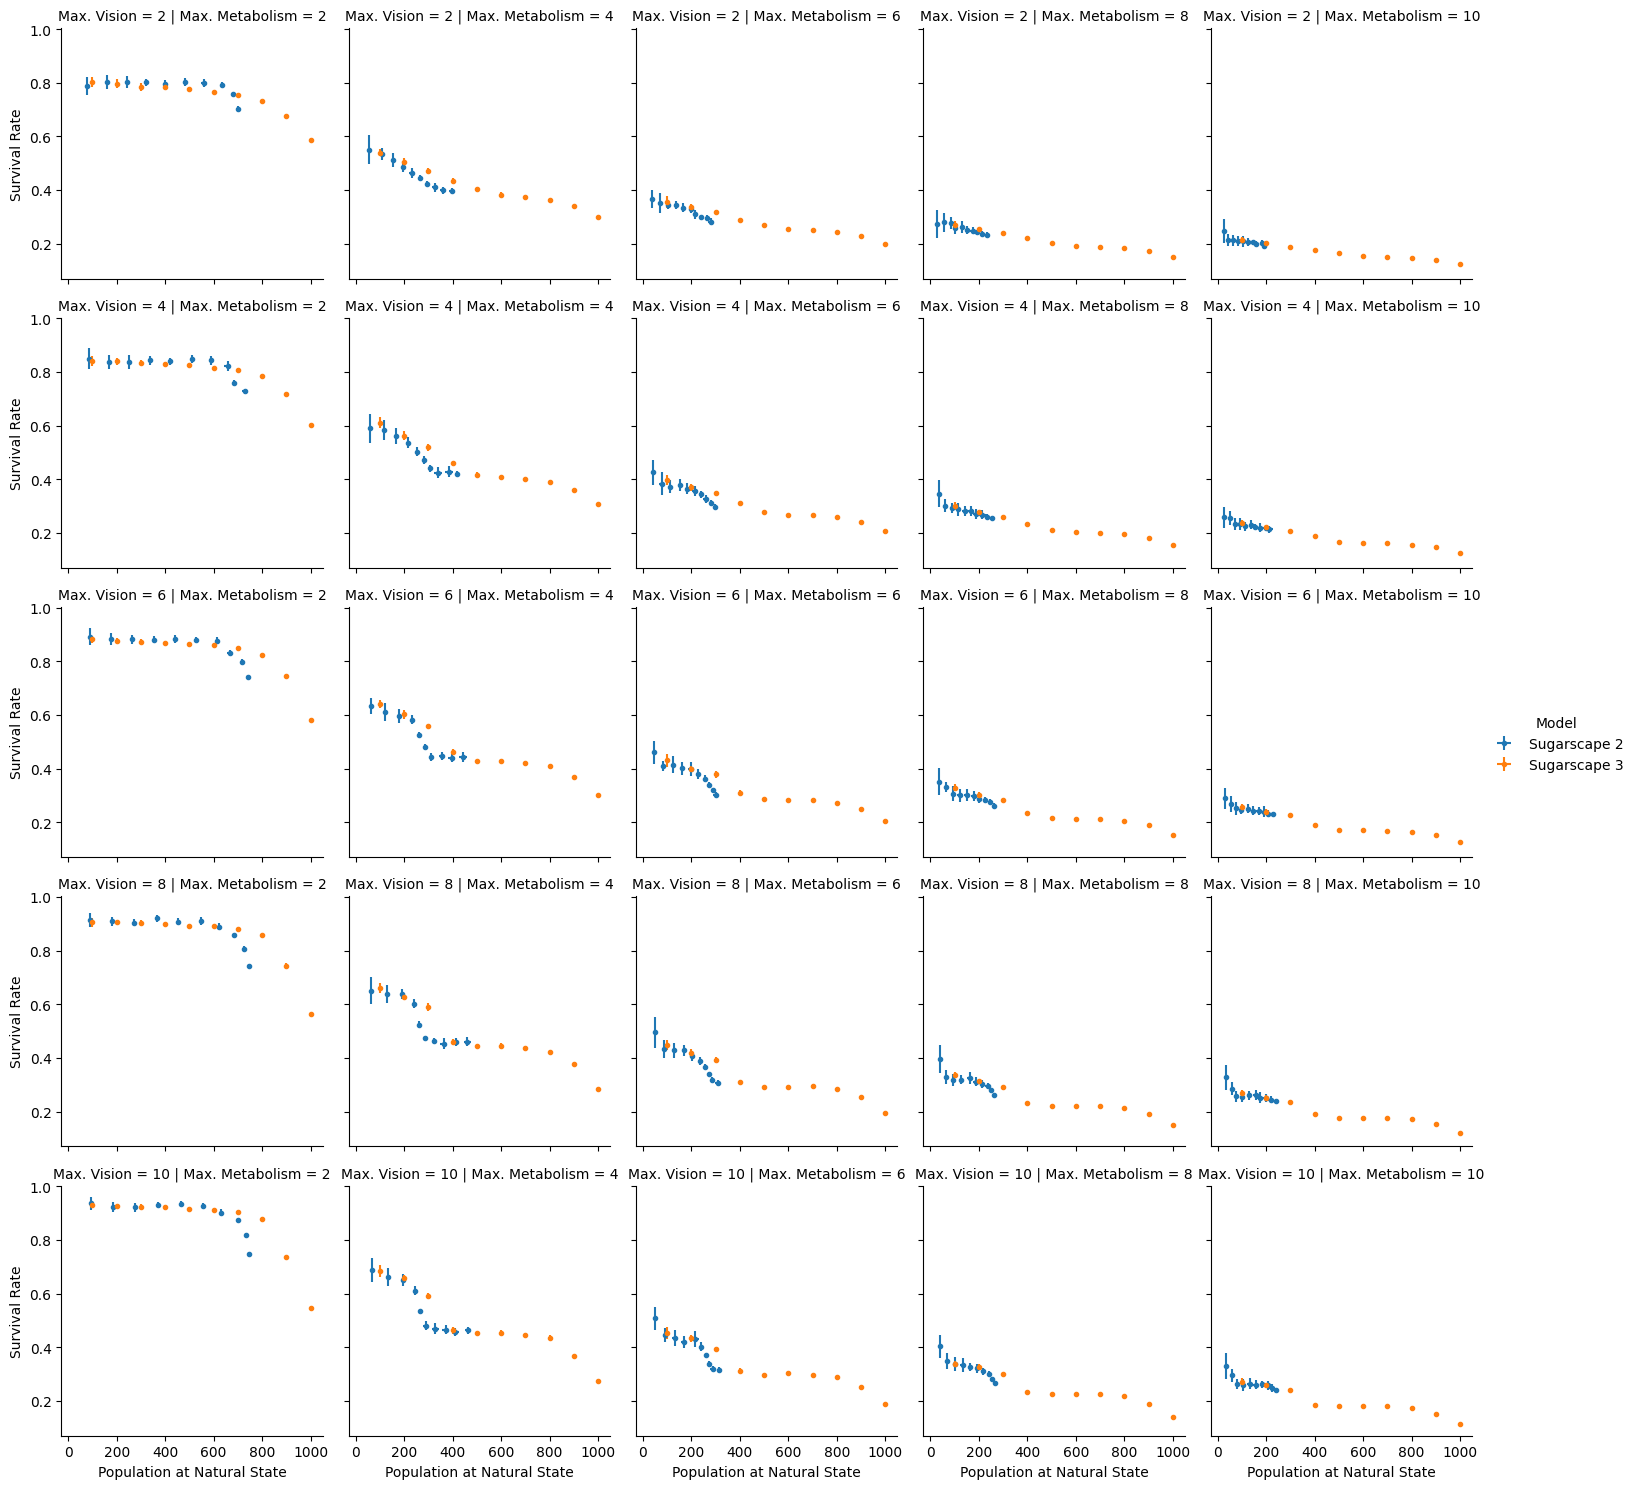

In [85]:
# create survival rate plot for combined

# init grid
combined_survival_plot = sns.FacetGrid(
    agg_df,
    col = 'Max. Metabolism',
    row = 'Max. Vision',
    hue = 'Model'
)

# create scatter plot
combined_survival_plot.map(
    plt.errorbar,
    'count turtles_mean', # x
    'survival-rate_mean', # y
    'survival-rate_std', # yerr
    'count turtles_std', # xerr
    fmt = 'o',
    markersize = 3    
)

# add legend
combined_survival_plot.add_legend(
    title = 'Model',
)

# set axis labels
combined_survival_plot.set_axis_labels(
    'Population at Natural State',
    'Survival Rate'
)

# show plot
# plt.show()

# save plot
plt.savefig('image/r_survival_rate_combined.png', bbox_inches = 'tight')



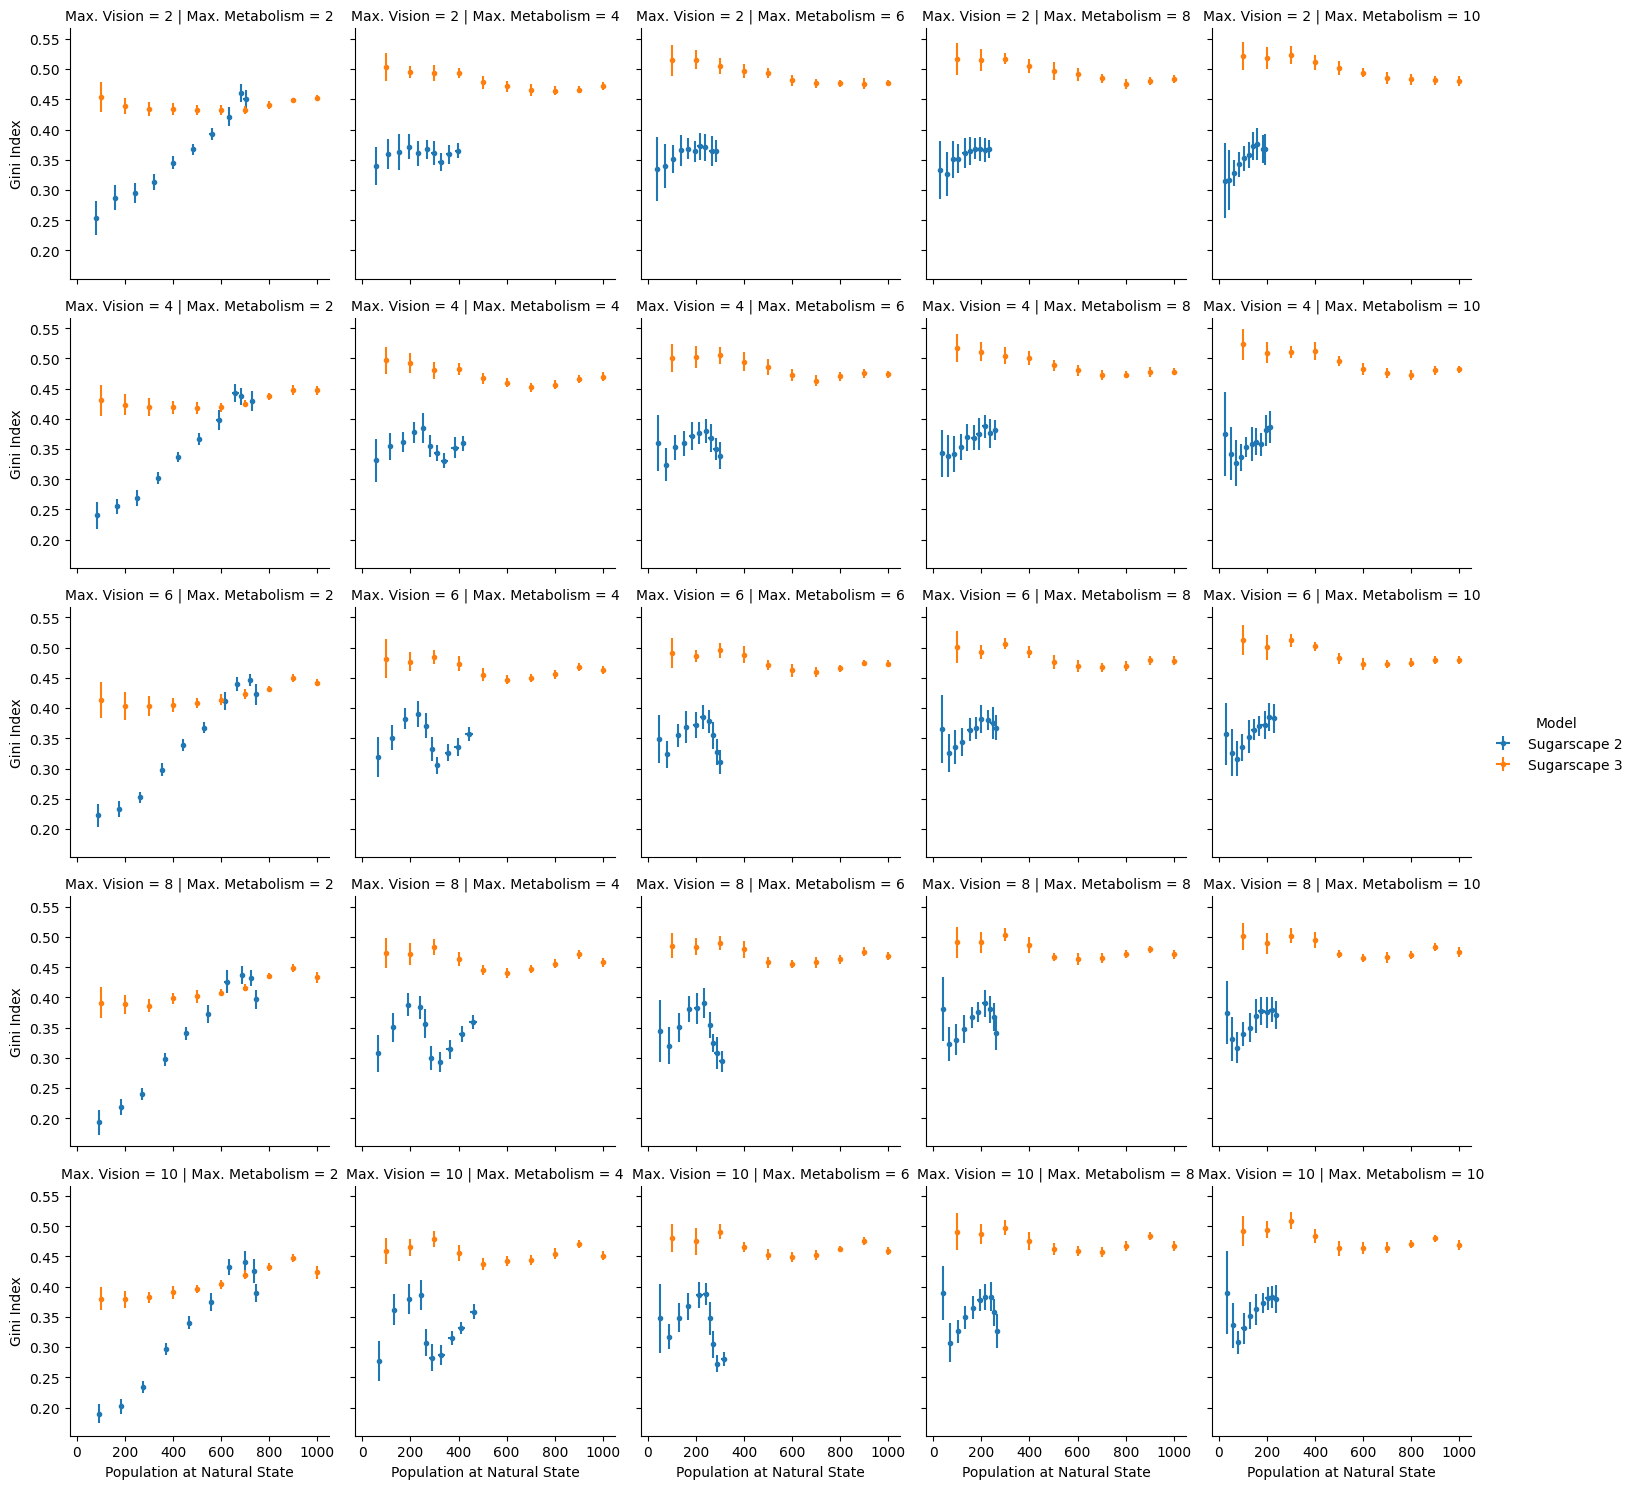

In [86]:
# create survival rate plot for combined

# init grid
combined_survival_plot = sns.FacetGrid(
    agg_df,
    col = 'Max. Metabolism',
    row = 'Max. Vision',
    hue = 'Model'
)

# create scatter plot
combined_survival_plot.map(
    plt.errorbar,
    'count turtles_mean', # x
    'gini-index_mean', # y
    'gini-index_std', # yerr
    'count turtles_std', # xerr
    fmt = 'o',
    markersize = 3    
)

# add legend
combined_survival_plot.add_legend(
    title = 'Model',
)

# set axis labels
combined_survival_plot.set_axis_labels(
    'Population at Natural State',
    'Gini Index'
)

# show plot
# plt.show()

# save plot
plt.savefig('image/r_gini_index_combined.png', bbox_inches = 'tight')



### Sugarscape 2 model

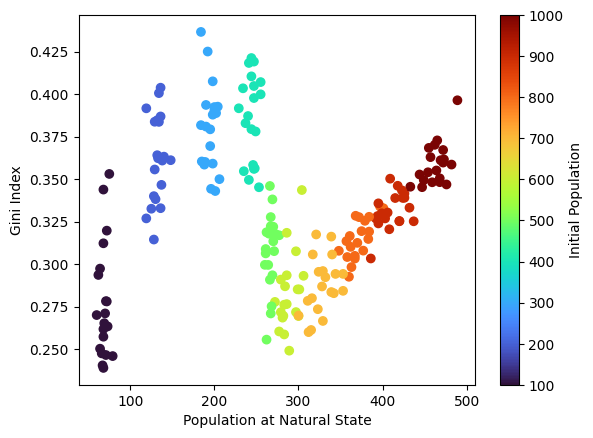

In [96]:
# plot for Gini Index

s2_mvp_filter = s2_df[(s2_df['max-vision'] == 10) & (s2_df['max-metabolism'] == 4)].copy()

plt.scatter(
    x = s2_mvp_filter['count turtles'],
    y = s2_mvp_filter['gini-index'],
    c = s2_mvp_filter['initial-population'],
    cmap = 'turbo'
)

# set axis labels
plt.xlabel('Population at Natural State')
plt.ylabel('Gini Index')

plt.colorbar(
    label = 'Initial Population'
)

# show plot
plt.savefig('image/r_s2_mvp_gini_filtered.png', bbox_inches = 'tight')



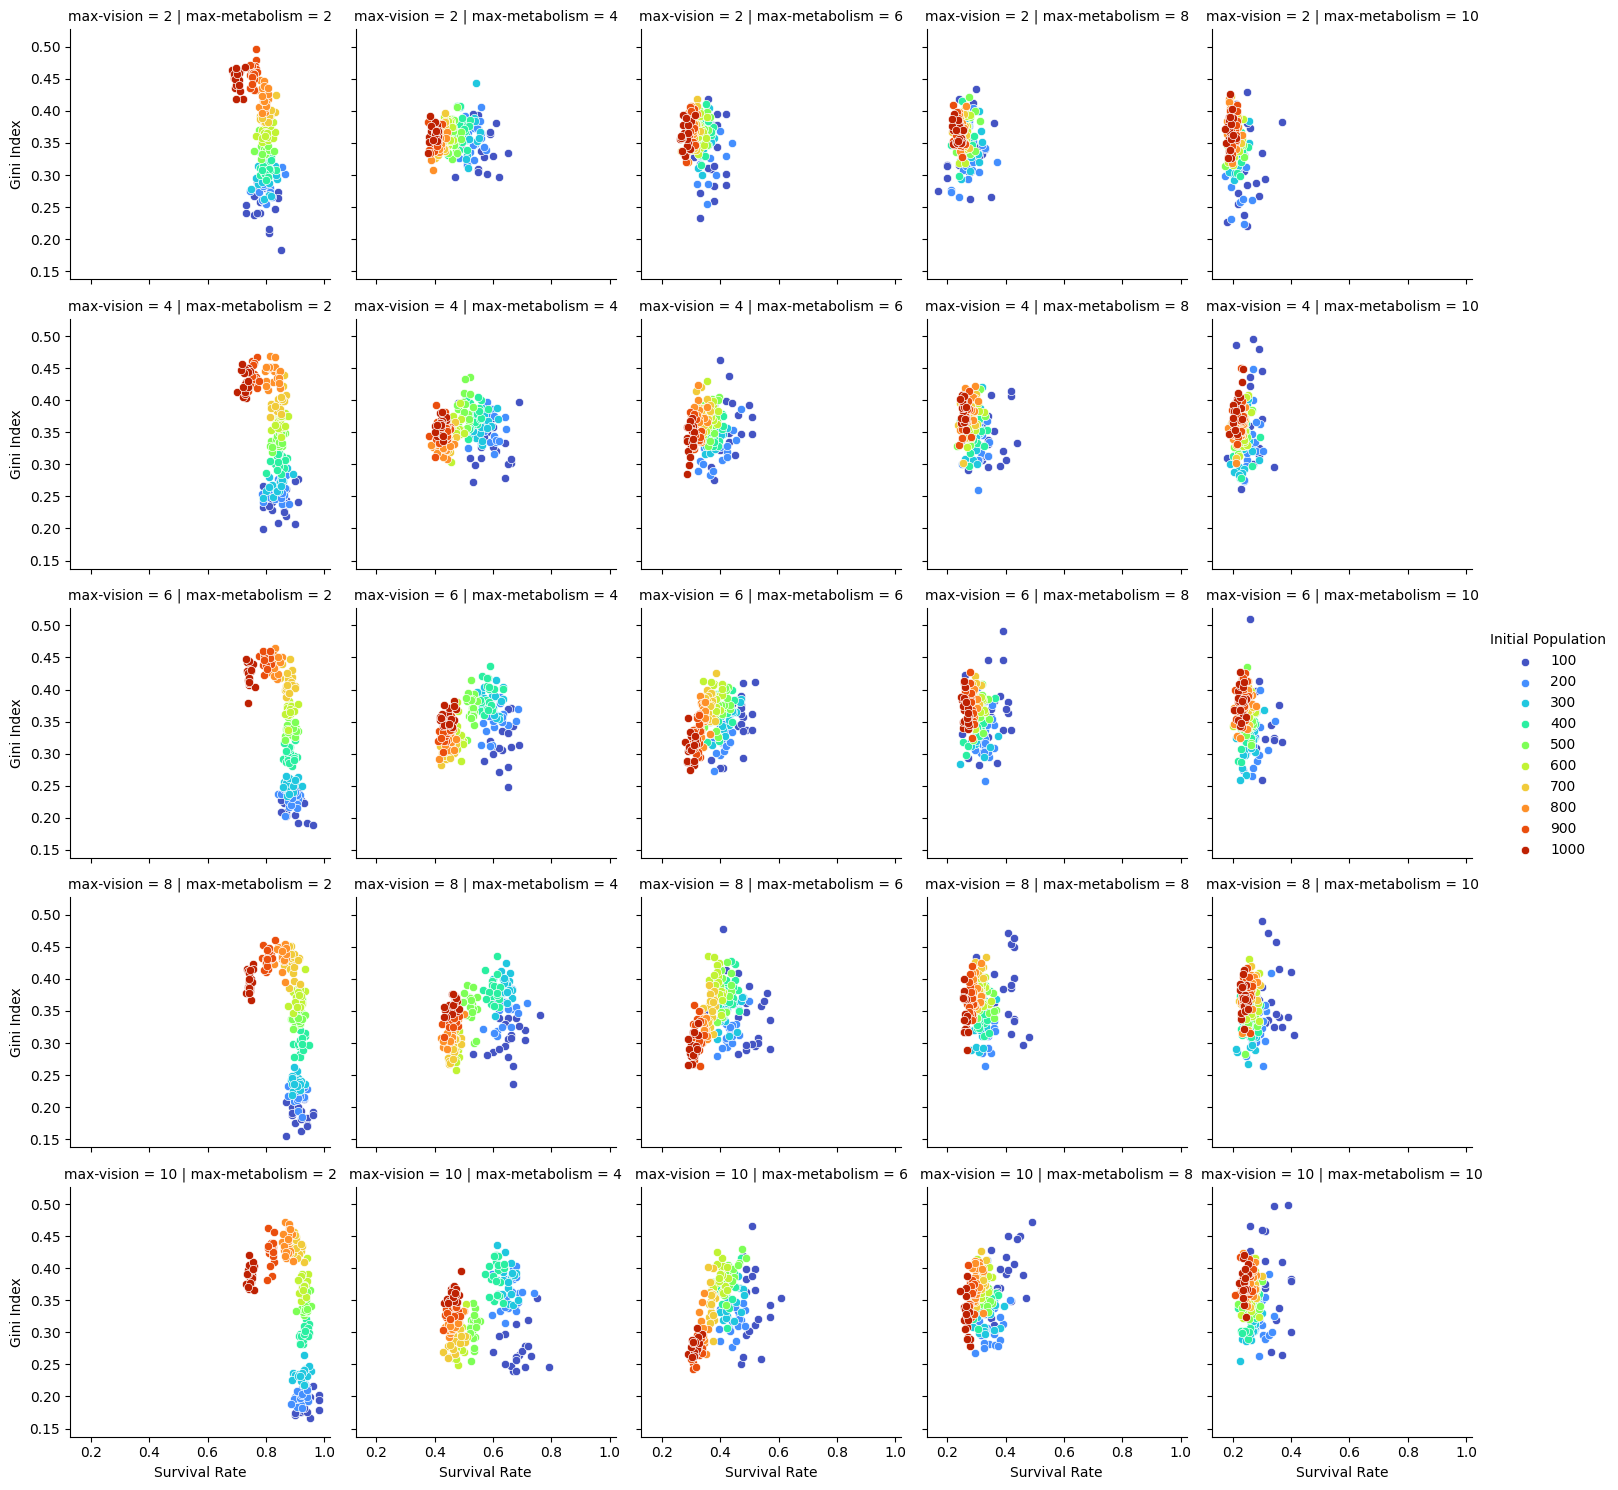

In [87]:
# create plot for s2

# init grid
s2_plot = sns.FacetGrid(
    s2_df,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population',
    palette = 'turbo'
)

# create scatter plot
s2_plot.map(
    sns.scatterplot,
    'survival-rate',
    'gini-index'    
)

# add legend
s2_plot.add_legend(title = 'Initial Population')

# set labels
s2_plot.set_xlabels('Survival Rate')
s2_plot.set_ylabels('Gini Index')

# show plot
plt.show()


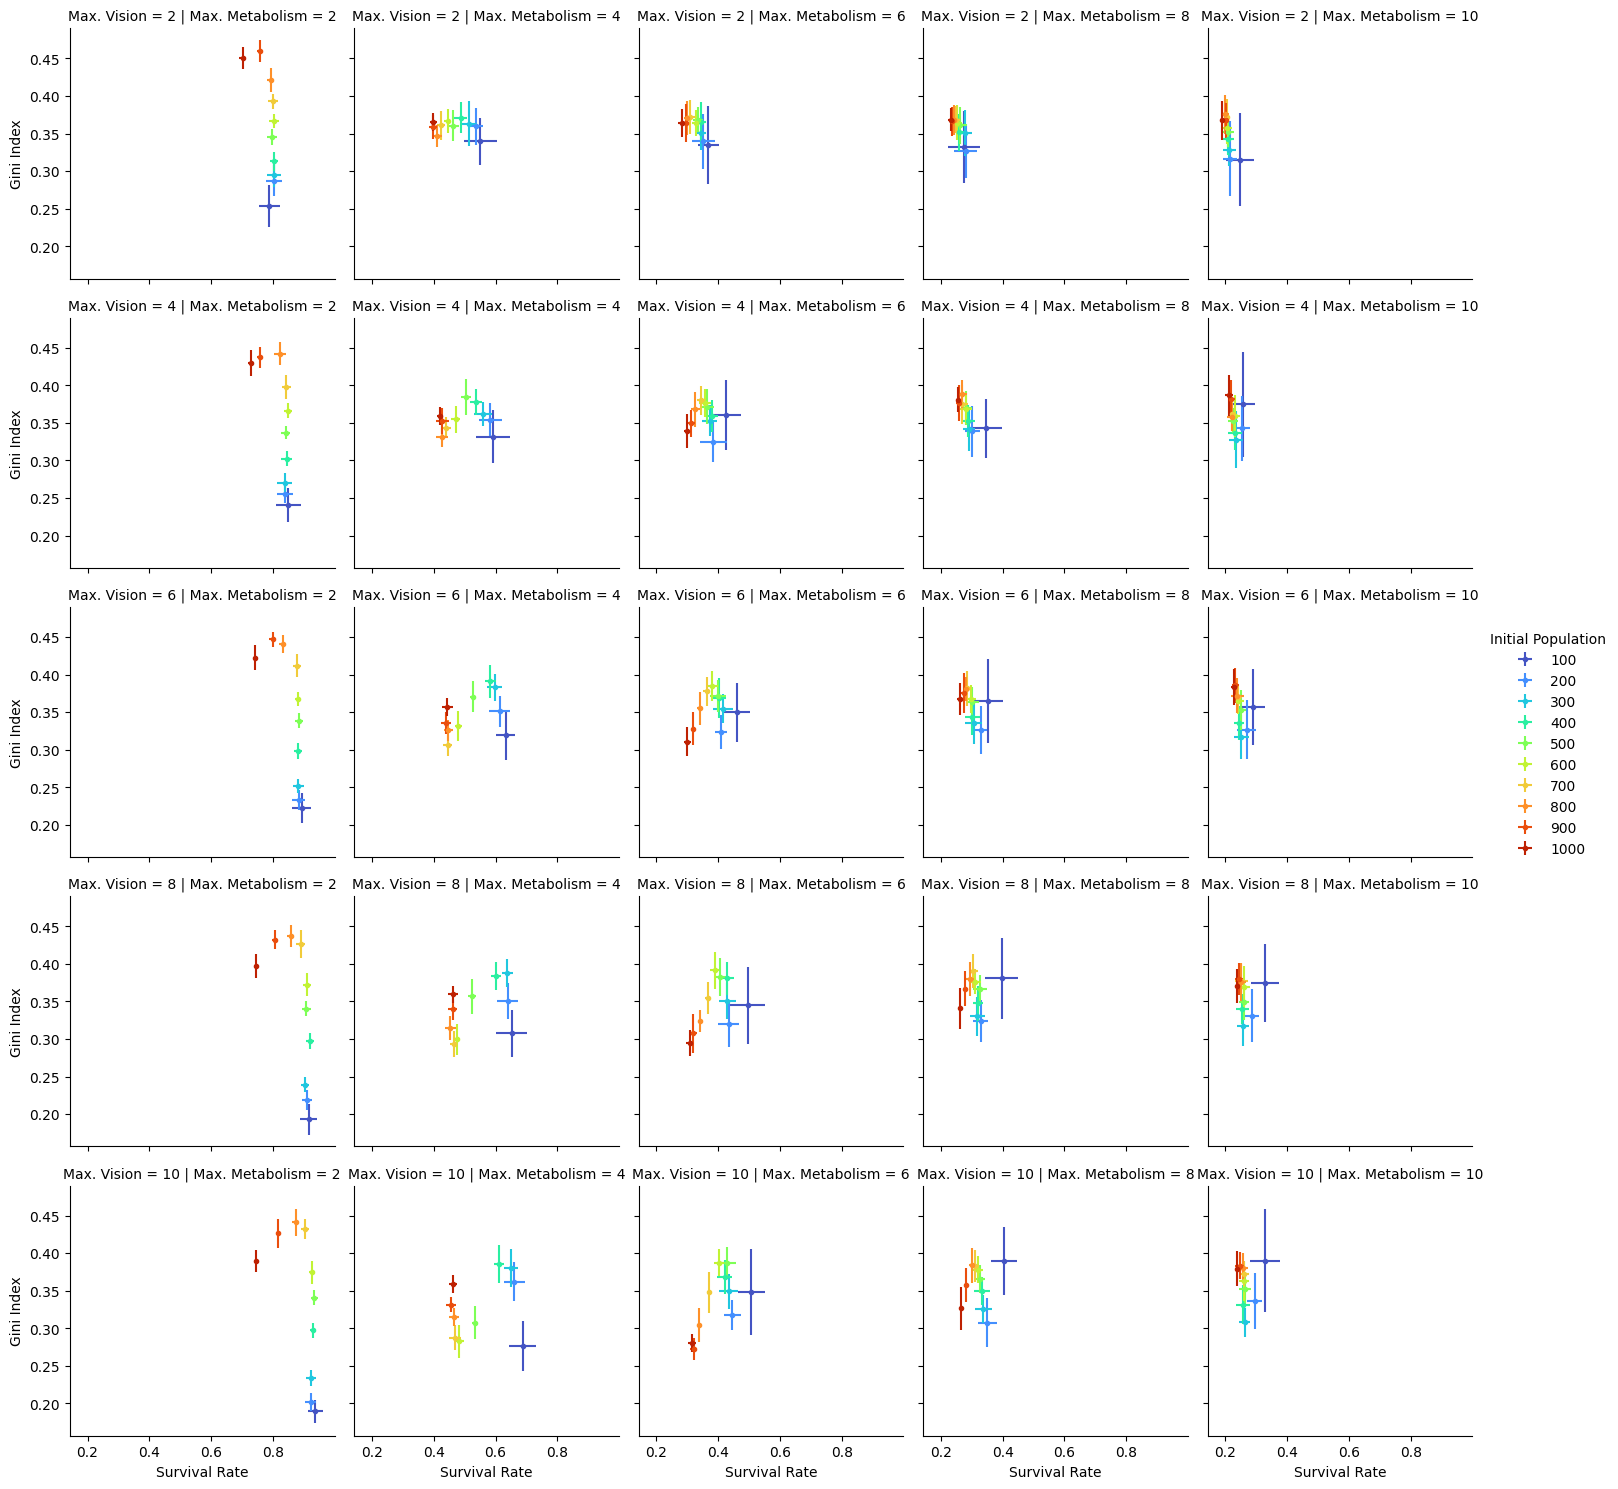

In [95]:
# create plot for s2

# init grid
s2_plot = sns.FacetGrid(
    agg_df[agg_df['Model'] == 'Sugarscape 2'],
    col = 'Max. Metabolism',
    row = 'Max. Vision',
    hue = 'Initial Population',
    palette = 'turbo'
)

# create scatter plot
s2_plot.map(
    plt.errorbar,
    'survival-rate_mean',
    'gini-index_mean',
    'gini-index_std',
    'survival-rate_std',
    fmt = 'o',
    markersize = 3    
)

# add legend
s2_plot.add_legend(title = 'Initial Population')

# set labels
s2_plot.set_xlabels('Survival Rate')
s2_plot.set_ylabels('Gini Index')

# show plot
plt.savefig('image/r_s2_mvp_gini_survival.png', bbox_inches = 'tight')
